<a href="https://colab.research.google.com/github/sarthakpant772/MLnow_2.0/blob/main/logestic_regression(using_sklearn).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linking drive

In [1]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [2]:
cd  '/content/drive/MyDrive/mashine_learning_models/loan_prediction '

/content/drive/MyDrive/mashine_learning_models/loan_prediction 


In [3]:
ls


dataset.xlsx  Untitled0.ipynb


#Data Cleaning


In [4]:
import pandas as pd
import numpy as np
import os


In [61]:
loan_data=pd.read_excel('dataset.xlsx')

In [62]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,Yes,1,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,No,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,NaN,NaN,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [10]:
for i in loan_data:
  print(i)

Loan_ID
Gender
Married
Dependents
Education
Self_Employed
ApplicantIncome
CoapplicantIncome
LoanAmount
Loan_Amount_Term
Credit_History
Property_Area
Loan_Status


In [72]:
print(f'Married:{loan_data.Married.unique()}')
print(f'Dependents:{loan_data.Dependents.unique()}')
print(f'Education:{loan_data.Education.unique()}')
print(f'self Employd:{loan_data.Self_Employed.unique()}')

Married:[1. 0.]
Dependents:[1 0 2 4]
Education:[1 0]
self Employd:[0. 1.]


In [71]:
loan_data.fillna(0,inplace=True)

In [65]:
loan_data['Married'] = loan_data['Married'].apply({'Yes':1, 'No':0}.get)

In [66]:
loan_data['Education'] = loan_data['Education'].apply({'Graduate':1, 'Not Graduate':0}.get)
loan_data['Self_Employed'] = loan_data['Self_Employed'].apply({'No':0, 'Yes':1}.get)


In [67]:
loan_data['Loan_Status'] = loan_data['Loan_Status'].apply({'Y':1,'N':0}.get)

In [68]:
loan_data['Dependents'] = loan_data['Dependents'].apply({'3+':4, 1:1,2:2,0:0}.get)

In [69]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,1.0,1,1,0.0,5849,0.0,0.0,360.0,1.0,Urban,1
1,LP001003,Male,1.0,0,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,0.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,NaN,0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,1


In [49]:
loan_data


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,1.0,1,1,0.0,5849,0.0,0.0,360.0,1.0,Urban,1
1,LP001003,Male,1.0,0,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,0.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,0.0,0,1,0.0,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,Male,1.0,3+,1,0.0,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,Male,1.0,1,1,0.0,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,Male,1.0,2,1,0.0,7583,0.0,187.0,360.0,1.0,Urban,1


In [73]:
loan_dataup= loan_data[['Married','Dependents','Education','Self_Employed','ApplicantIncome','LoanAmount','Credit_History','Loan_Status']]

In [74]:
loan_dataup.head()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Credit_History,Loan_Status
0,1.0,1,1,0.0,5849,0.0,1.0,1
1,1.0,0,1,0.0,4583,128.0,1.0,0
2,1.0,0,1,1.0,3000,66.0,1.0,1
3,0.0,0,0,0.0,2583,120.0,1.0,1
4,0.0,0,1,0.0,6000,141.0,1.0,1


In [75]:
loan_dataup.to_csv('cleanedData.csv')

#EDA

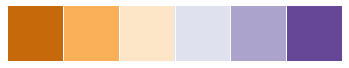

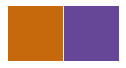

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.palplot(sns.color_palette("PuOr"))
pal = sns.color_palette('PuOr', 6)
pal.as_hex()
plt.style.use(['seaborn'])
sns_colors = ["#c6690c", "#664697"]
sns.set_palette(sns_colors)
sns.palplot(sns.color_palette(sns_colors))

In [77]:
print(loan_dataup.columns)

Index(['Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'LoanAmount', 'Credit_History', 'Loan_Status'],
      dtype='object')


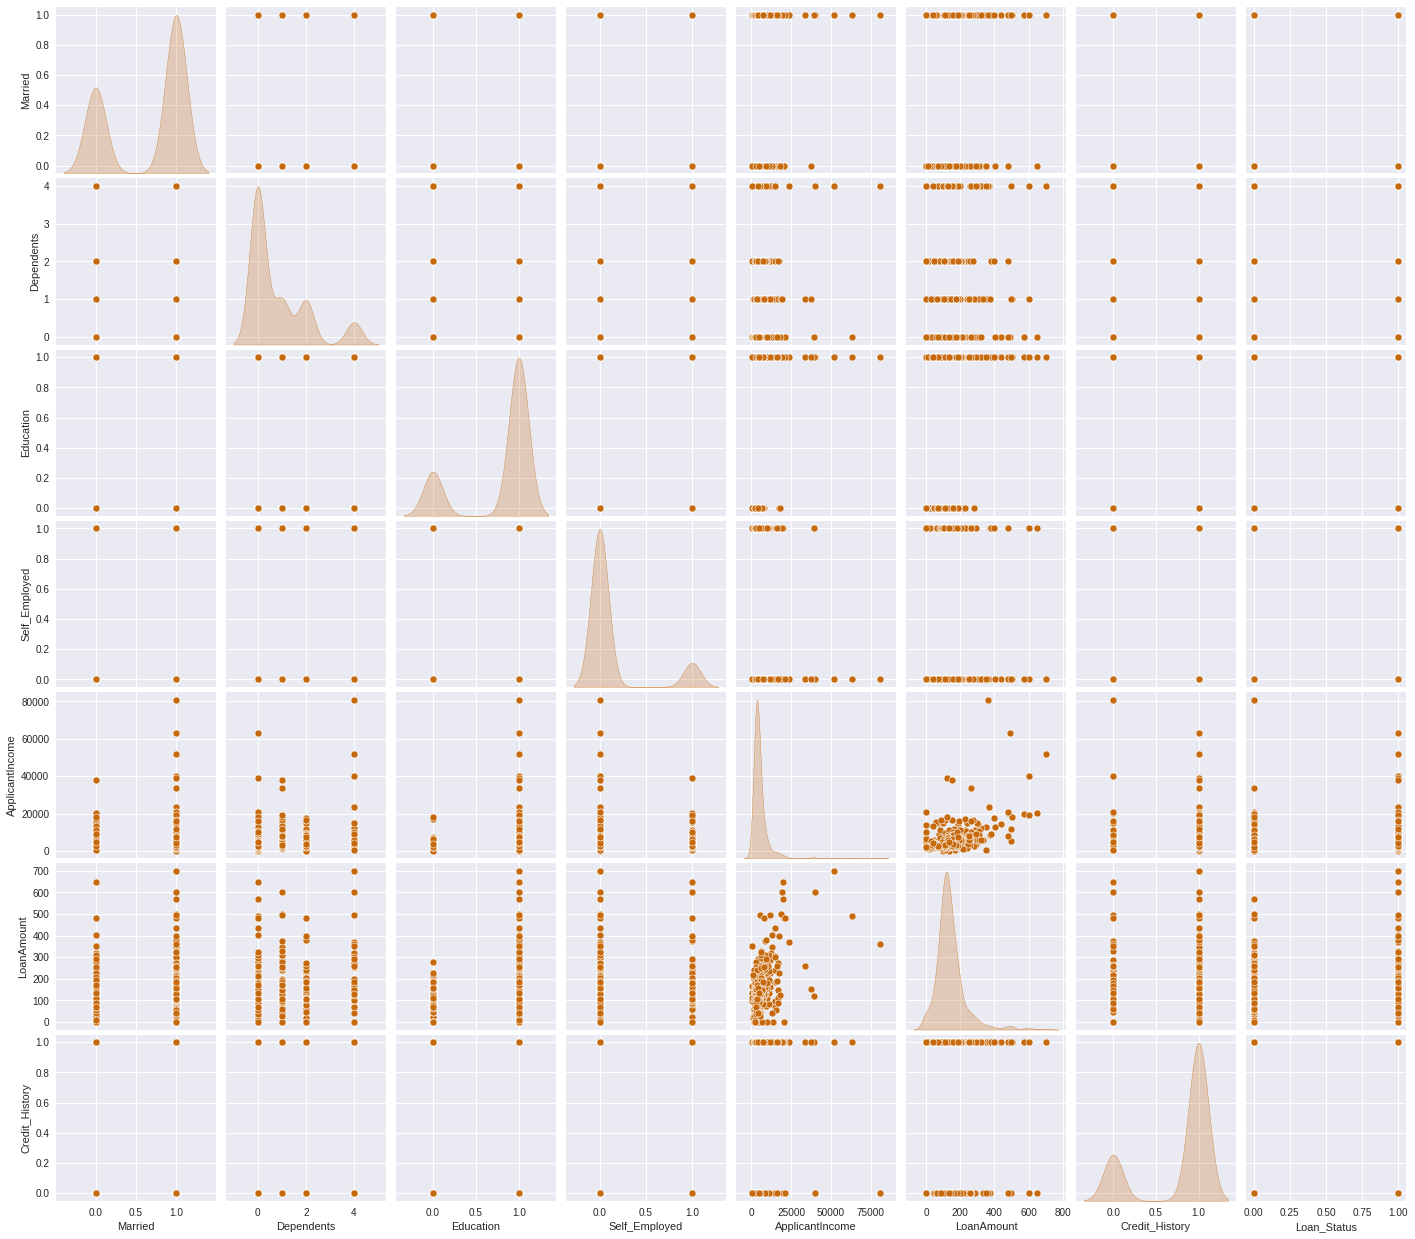

In [78]:
sns.pairplot(loan_dataup,
              x_vars=['Married', 'Dependents', 'Education', 'Self_Employed','ApplicantIncome', 'LoanAmount', 'Credit_History', 'Loan_Status'],
              y_vars=['Married', 'Dependents', 'Education', 'Self_Employed','ApplicantIncome', 'LoanAmount', 'Credit_History'],
              diag_kind='kde')

#Analysis form the data.

### Q1) Do applicant income matter?
```Yes it do, as we can see that the success rate of getting a loan is greater beterrn 20K to 60K and married at same time ```


#Data spliting 


In [79]:
trainData=loan_dataup.sample(frac=0.8 , random_state=0)
testData=loan_dataup.drop(trainData.index)

In [81]:
print(trainData.head())
print(testData.head())

     Married  Dependents  Education  ...  LoanAmount  Credit_History  Loan_Status
454      0.0           0          1  ...        84.0             1.0            1
52       0.0           0          1  ...       112.0             1.0            0
536      1.0           0          1  ...       324.0             1.0            1
469      1.0           0          1  ...       110.0             1.0            0
55       1.0           2          1  ...        97.0             1.0            1

[5 rows x 8 columns]
    Married  Dependents  Education  ...  LoanAmount  Credit_History  Loan_Status
3       0.0           0          0  ...       120.0             1.0            1
9       1.0           1          1  ...       349.0             1.0            0
11      1.0           2          1  ...       109.0             1.0            1
19      1.0           0          1  ...       115.0             1.0            1
23      1.0           2          0  ...       112.0             0.0            0


In [92]:
x_train=trainData.copy()
x_test=testData.copy()

print(x_train)
print(x_test)

     Married  Dependents  Education  ...  LoanAmount  Credit_History  Loan_Status
454      0.0           0          1  ...        84.0             1.0            1
52       0.0           0          1  ...       112.0             1.0            0
536      1.0           0          1  ...       324.0             1.0            1
469      1.0           0          1  ...       110.0             1.0            0
55       1.0           2          1  ...        97.0             1.0            1
..       ...         ...        ...  ...         ...             ...          ...
451      1.0           2          0  ...        60.0             0.0            1
260      1.0           1          1  ...       330.0             0.0            1
352      1.0           4          1  ...        95.0             1.0            1
270      0.0           0          1  ...        30.0             1.0            1
317      1.0           0          1  ...        88.0             0.0            1

[491 rows x 8 c

In [93]:
y_test=x_test.pop('Loan_Status')
y_train=x_train.pop('Loan_Status')

print(y_train)
print(y_test)

454    1
52     0
536    1
469    0
55     1
      ..
451    1
260    1
352    1
270    1
317    1
Name: Loan_Status, Length: 491, dtype: int64
3      1
9      0
11     1
19     1
23     0
      ..
586    1
594    1
599    1
600    0
608    1
Name: Loan_Status, Length: 123, dtype: int64


# Problem statement 


create a classification model to pridict loan will get passed or not

In [94]:
from sklearn.linear_model import LogisticRegression

In [95]:
classifier = LogisticRegression(random_state=0,solver='liblinear')
classifier = classifier.fit(x_train,y_train)

In [96]:
y_train_pred= classifier.predict(x_train)

In [97]:
y_test_pred= classifier.predict(x_test)

In [98]:
from sklearn.metrics import confusion_matrix
cm_train = confusion_matrix(y_train,y_train_pred)
cm_test = confusion_matrix(y_test,y_test_pred)

In [103]:
def predPlot(labels, preds):
  plt.scatter(labels, preds)
  plt.xlabel('True-Values/Labels')
  plt.ylabel('Predicted-Values')
  plt.axis('equal')
  plt.axis('square')
  #plt.xlim([0,plt.xlim()[1]])
  #plt.ylim([0,plt.ylim()[1]])
  #plt.plot([-100,100],[-100,100])
  plt.show()

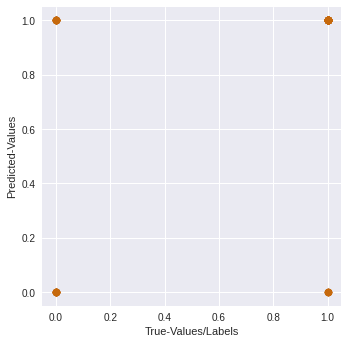

In [104]:
predPlot(y_test,y_test_pred)

In [105]:
from sklearn.metrics import accuracy_score

#accuracy of our model 

In [106]:
 accuracy_score(y_test, y_test_pred)

0.7317073170731707